<a href="https://colab.research.google.com/github/LilianYou/individual_path/blob/master/psych239_final_proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/gdrive', force_remount=True) # if files in the google drive is updated

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Step 1. Read raw data from google drive


In [3]:
# please share the drive folder by using "https://drive.google.com/open?id=13tXB6uLEg60Tl01sSNlP7hthITKdgKiw"
!ls /content/gdrive/'My Drive'/psych239_project  # check data

Lily_and_Carol


In [0]:
# define path
PATH = "./gdrive/My Drive/psych239_project/Lily_and_Carol"

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
# define sub_directory
train_lily_dir = os.path.join(train_dir, 'Lily')  # directory with our training Lily's data
train_carol_dir = os.path.join(train_dir, 'Carol')  # directory with our training Carol's data
validation_lily_dir = os.path.join(validation_dir, 'Lily')  # directory with our validation Lily's data
validation_carol_dir = os.path.join(validation_dir, 'Carol')  # directory with our validation Carol's data

Step 2. Process raw data into images

In [0]:
import json

In [0]:
!mkdir data # store images
!mkdir data/train
!mkdir data/validation


In [0]:
#data = []
def mkdata(directory):
  title_split = np.char.split(directory,'Lily_and_Carol/') # make new sub-directories
  new_dir = os.path.join('/content/data', title_split.item(0)[1])
  os.mkdir(new_dir)
  
  for filename in os.listdir(directory):
    if filename.endswith("json"): # read json files
        print(filename)
        fullname = os.path.join(directory, filename)
        with open(fullname) as f:
           data = json.load(f)
        player_dat = data['player']     # extract coordinates from json files
        x_dat = np.zeros(len(player_dat))
        y_dat = np.zeros(len(player_dat))

        for i in range(len(player_dat)):
          #print(i)
          x_dat[i] = player_dat[i]['x']
          y_dat[i] = player_dat[i]['y']
          #print(x_dat[i])
        plt.scatter(x_dat, y_dat)   # plot travel trajectory and save as plots in new directory
        plt.gcf()
        plt.draw()
        filename_split = np.char.split(filename,'.json')
        plot_dir = os.path.join(new_dir,filename_split.item(0)[0]) # image name is the same as json file
        plt.savefig(plot_dir, dpi=100)
        plt.show()
        #data.append(filename)

level001_attempt001_id002.json


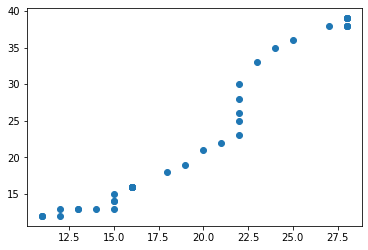

level002_attempt001_id003.json


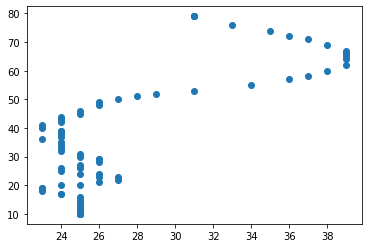

level003_attempt001_id004.json


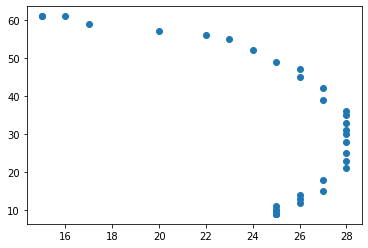

level011_attempt001_id001.json


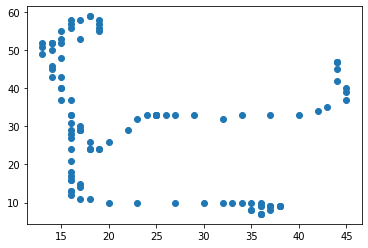

level001_attempt001_id012.json


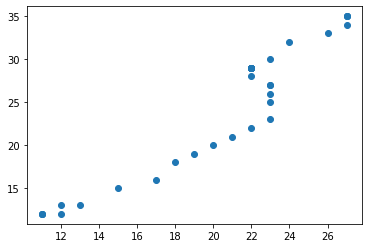

level002_attempt001_id010.json


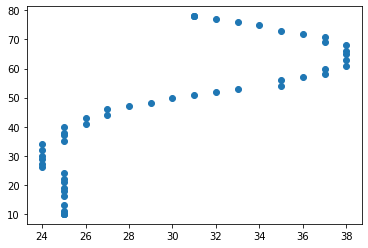

level003_attempt001_id002.json


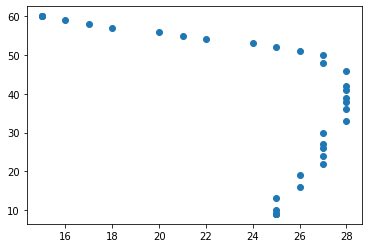

level011_attempt001_id007.json


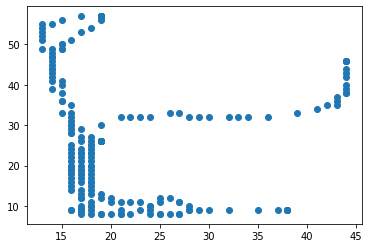

level006_attempt001_id007.json


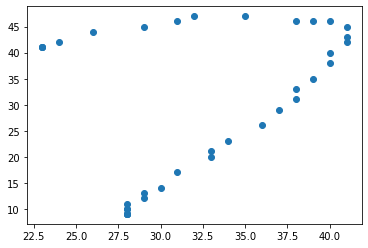

level008_attempt001_id006.json


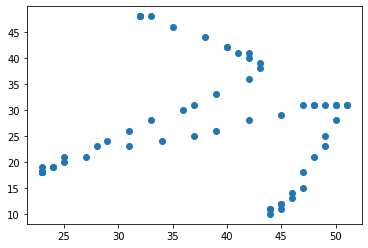

level006_attempt001_id005.json


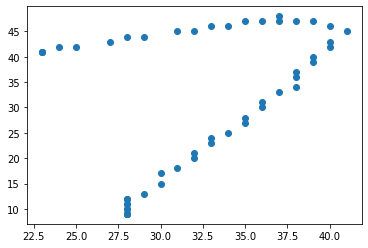

level007_attempt001_id008.json


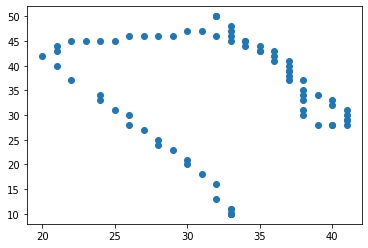

level008_attempt001_id011.json


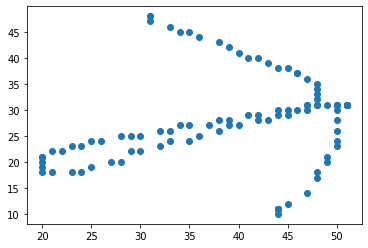

level013_attempt001_id004.json


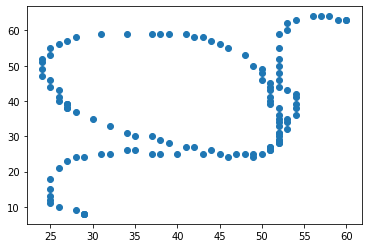

level012_attempt001_id000.json


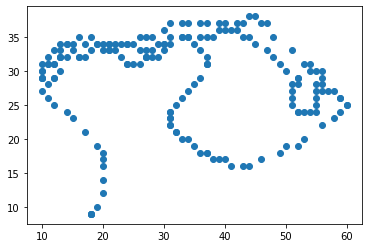

In [10]:
mkdata(train_carol_dir)
mkdata(train_lily_dir)
mkdata(validation_carol_dir)
mkdata(validation_lily_dir)

Step 3. Read images for classification


In [0]:
# define path
PATH = "./data"

In [0]:
train_dir_new = os.path.join(PATH, 'train')
validation_dir_new  = os.path.join(PATH, 'validation')

In [0]:
# define sub_directory
train_lily_dir_new  = os.path.join(train_dir_new , 'Lily')  # directory with our training Lily's data
train_carol_dir_new  = os.path.join(train_dir_new , 'Carol')  # directory with our training Carol's data
validation_lily_dir_new  = os.path.join(validation_dir_new , 'Lily')  # directory with our validation Lily's data
validation_carol_dir_new  = os.path.join(validation_dir_new , 'Carol')  # directory with our validation Carol's data

In [0]:
num_lily_tr = len(os.listdir(train_lily_dir_new))
num_carol_tr = len(os.listdir(train_carol_dir_new))

num_lily_val = len(os.listdir(validation_lily_dir_new))
num_carol_val = len(os.listdir(validation_carol_dir_new))

total_train = num_lily_tr + num_carol_tr
total_val = num_lily_val + num_carol_val

In [0]:
# For convenience, set up variables to use while pre-processing the dataset and training the network.

batch_size = 2
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

In [0]:
#image_gen_train = ImageDataGenerator(
          #          rescale=1./255,
             #      rotation_range=45,
               #     width_shift_range=.15,
               #     height_shift_range=.15,
               #     horizontal_flip=True,
               #     zoom_range=0.5
              #      ) # only apply augmentation to training set

In [17]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir_new,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 8 images belonging to 2 classes.


In [27]:
ls -al data/train

total 16
drwxr-xr-x 4 root root 4096 Mar 18 10:52 ./
drwxr-xr-x 4 root root 4096 Mar 18 10:34 ../
drwxr-xr-x 2 root root 4096 Mar 18 10:50 Carol/
drwxr-xr-x 2 root root 4096 Mar 18 10:50 Lily/


In [0]:
os.rmdir('data/train/.ipynb_checkpoints/')

In [0]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [19]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir_new,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 7 images belonging to 2 classes.


In [31]:
ls -al data/validation

total 20
drwxr-xr-x 5 root root 4096 Mar 18 10:50 ./
drwxr-xr-x 4 root root 4096 Mar 18 10:34 ../
drwxr-xr-x 2 root root 4096 Mar 18 10:50 Carol/
drwxr-xr-x 2 root root 4096 Mar 18 10:41 .ipynb_checkpoints/
drwxr-xr-x 2 root root 4096 Mar 18 10:50 Lily/


In [0]:
os.rmdir('data/validation/.ipynb_checkpoints/')

Step 4. Visualize training images

In [0]:
sample_training_images, _ = next(train_data_gen)


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

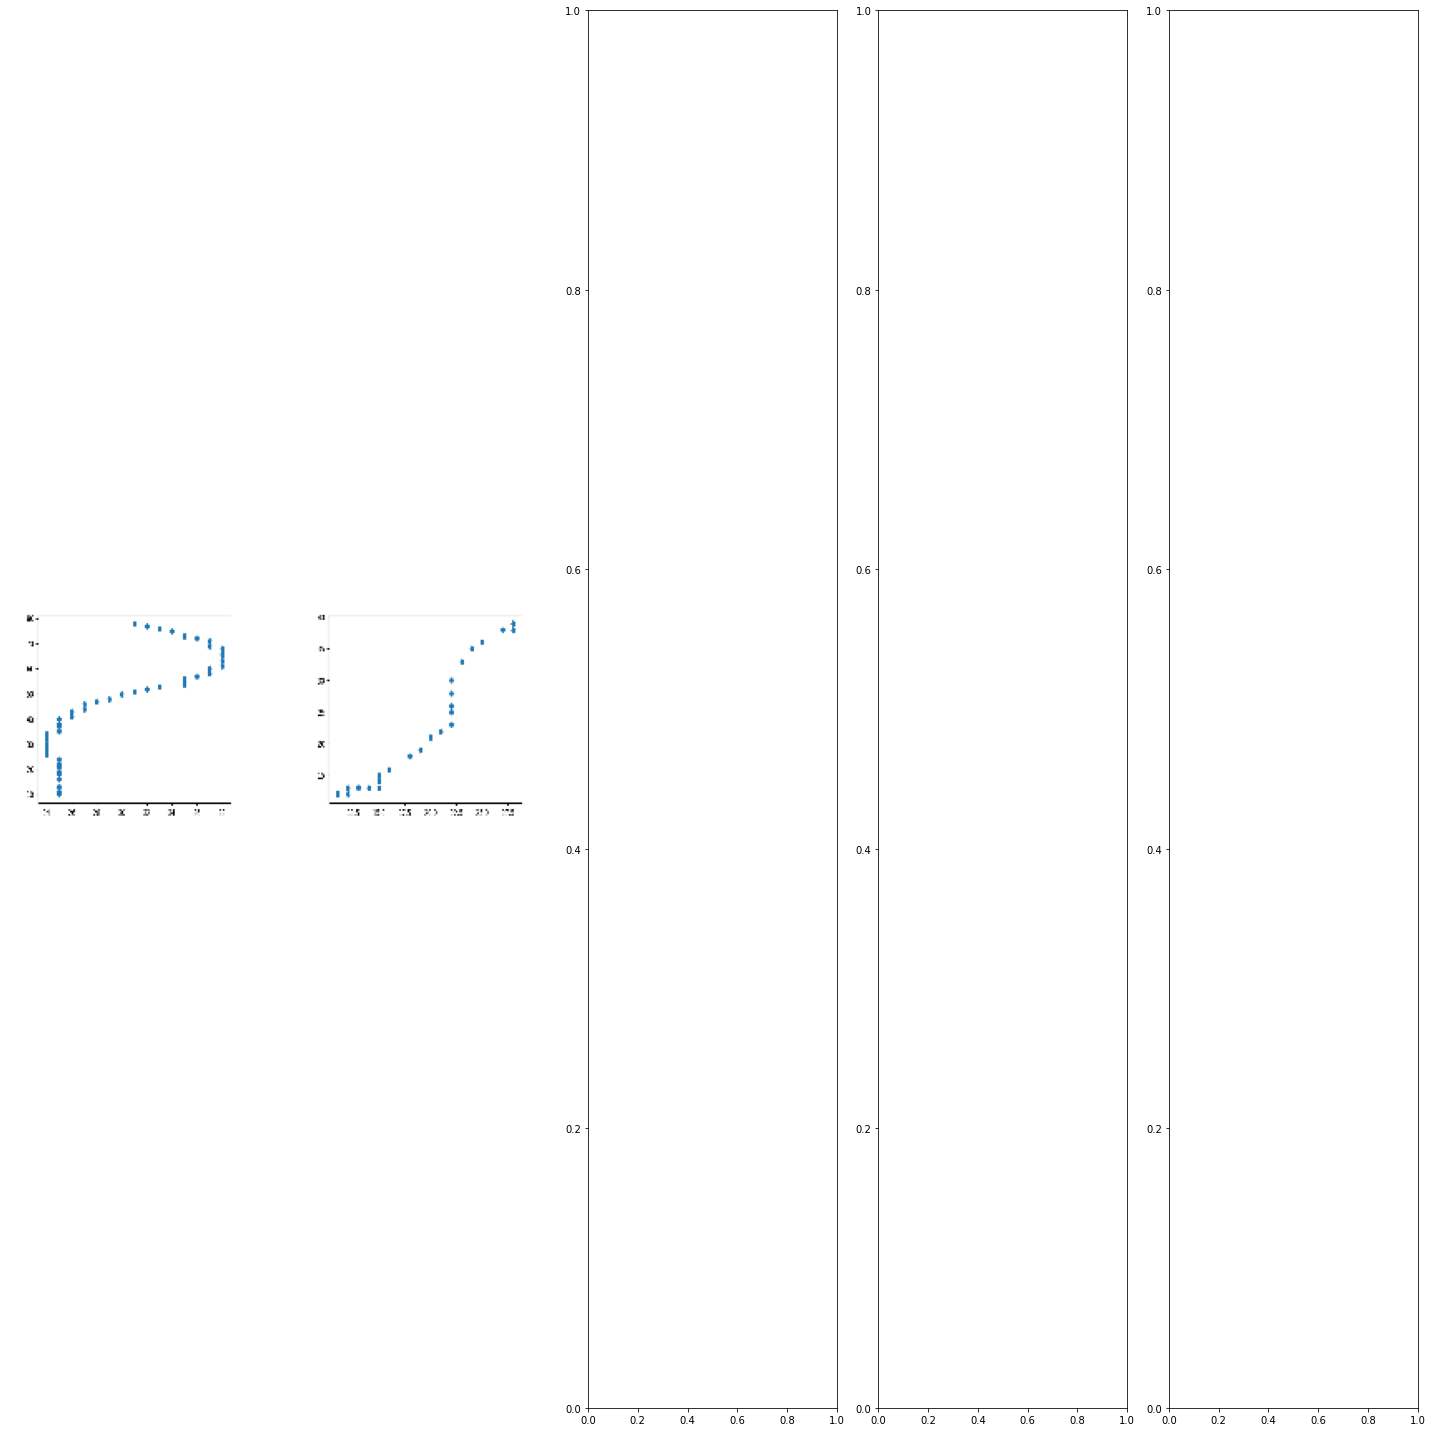

In [22]:
plotImages(sample_training_images[:2])


Step 5. Create the model

In [23]:
# The model consists of three convolution blocks with a max pool layer in each of them. 
#There's a fully connected layer with 512 units on top of it that is activated by a relu activation function.

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),    
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [24]:
# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
# model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

Step 5. Train the model

In [26]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
4/4 [==============================] - 2s 481ms/step - loss: 6.3215 - acc: 0.2500 - val_loss: 1.1735 - val_acc: 0.3333
Epoch 2/10
4/4 [==============================] - 1s 240ms/step - loss: 0.9842 - acc: 0.5000 - val_loss: 0.7389 - val_acc: 0.3333
Epoch 3/10
4/4 [==============================] - 1s 199ms/step - loss: 0.6730 - acc: 0.5000 - val_loss: 0.6889 - val_acc: 0.3333
Epoch 4/10
4/4 [==============================] - 1s 201ms/step - loss: 0.7092 - acc: 0.5000 - val_loss: 0.6663 - val_acc: 0.3333
Epoch 5/10
4/4 [==============================] - 1s 234ms/step - loss: 0.7029 - acc: 0.5000 - val_loss: 0.6753 - val_acc: 0.3333
Epoch 6/10
4/4 [==============================] - 1s 224ms/step - loss: 0.6965 - acc: 0.5000 - val_loss: 0.6835 - val_acc: 0.3333
Epoch 7/10
4/4 [==============================] - 1s 237ms/step - loss: 0.7028 - acc: 0.5000 - val_loss: 0.6893 - val_acc: 0.3333
Epoch 8/10
4/4 [==============================] - 1s 214ms/step - loss: 0.6976 - acc: 0.50

Step 6. Visualize training results

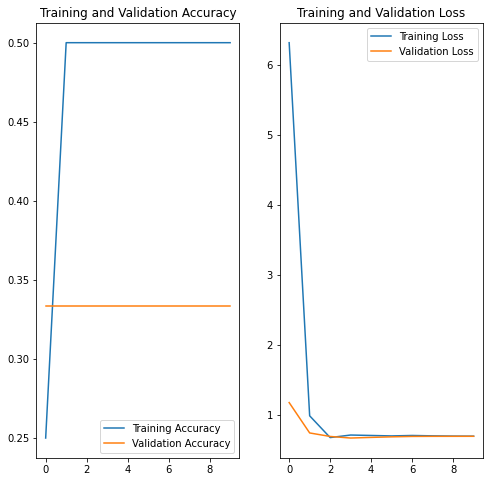

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Obviously, there is overfitting due to the big difference between the training and validation accuracy. I've already tried applying augmentation to training datasets and dropout for the neural network. The validation accuracy has improved after the using dropout but dropped after using augmentation. Therefore, I maintained dropout in the model but deleted augmentation in the training sets. In addition, the data sample is too small to make it well-trained although the algorithms seems fine.